Lets explore an example pytorch end to end workflow

what we are covering

# data preparing and load
# build model
# how to fit model to data  (training)
# making prediction and evaluting a model 
# saving and loading the model
# putting it all together

In [5]:
# Pytorch workflow

import torch 
from torch import nn   # for neural networks
import matplotlib.pyplot as plt

torch.__version__

#  create a known  parameters

weight = 0.7
bias = 0.3

#  create
start = 0
end =1
step = 0.02

X= torch.arange(start , end , step).unsqueeze(dim=1)

Y =weight * X + bias

print(X[:10],Y[:10])

print(len(X) , len(Y))




tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


In [11]:
#  Lets create a training set with our data

train_split = int(0.8 * len(X))
X_train , Y_train = X[:train_split], Y[:train_split]
X_test , Y_test = X[train_split:] , Y[train_split:]

print(len(X_train),  len(Y_test))

40 10


Better visualization of data

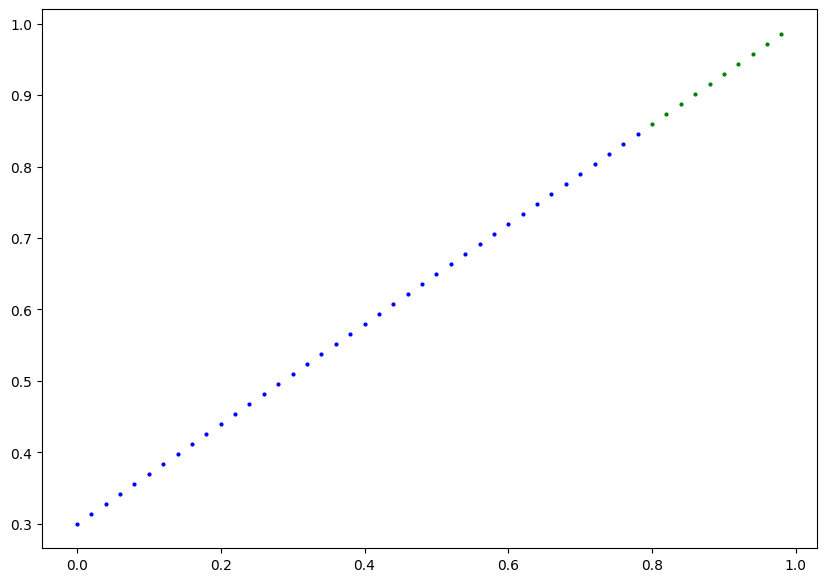

In [15]:
def plot_predection(train_data = X_train 
                    , train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predection = None
                    ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data , train_labels , c='b' , s=4 , label="Training data" )

    plt.scatter(test_data , test_labels , c='g' , s=4 , label="Testing data" )

    # are there predection? 
    if predection is not None:
        #  plot the predection
        plt.scatter(test_data ,predection,  c='r' , s=4 , label= "PRedection")

    #  show the legeds
        plt.legend(prop={'size':14})

plot_predection()

Building our first pytorch model

In [597]:
#  Linear regression model using pytorch

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True , dtype=torch.float))

    # write forward method to define the computation in the model
        
    def forward(self , x:torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [613]:
#  create a random seed
torch.manual_seed(24)

#  create an instance of the model (this is a subclass of nn.module)
model_0 =LinearRegressionModel()

# check out the patameters
list(model_0.parameters())

# named parameters 
print(model_0.state_dict())



OrderedDict([('weight', tensor([1.0139])), ('bias', tensor([0.8988]))])


tensor([[1.7100],
        [1.7303],
        [1.7505],
        [1.7708],
        [1.7911],
        [1.8114],
        [1.8317],
        [1.8519],
        [1.8722],
        [1.8925]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


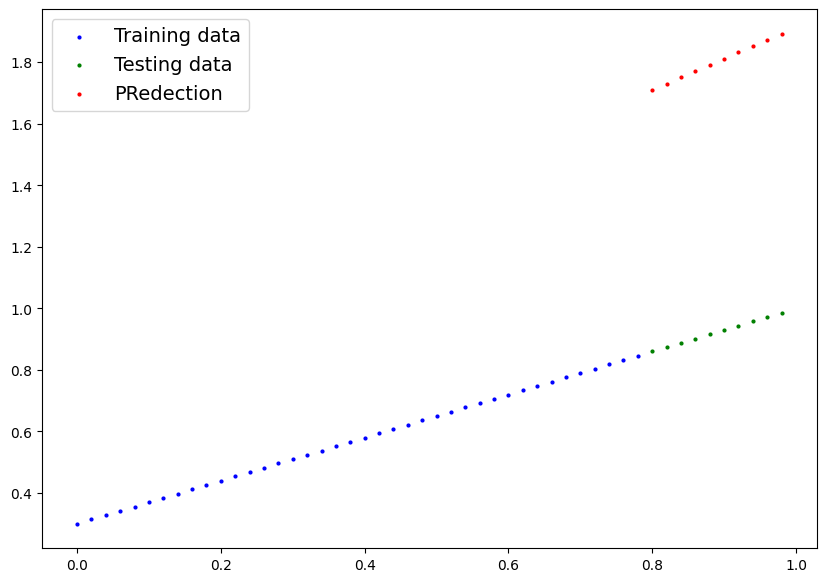

In [614]:
#  making prediction using torch.inference_mode()

with torch.inference_mode():
    y_preds = model_0(X_test)

print(y_preds)
print(Y_test)

plot_predection(predection=y_preds)


* loop through data
* forward pass
* calculate the loss
* optimizer zero grad
* loss backward
* optimizer step

In [615]:
#  Train Model
#  let's use L1 loss function

loss_fn = nn.L1Loss()

#  Setup an optimiser (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters() , lr=0.01)

# an epoch is one loop through data...

torch.manual_seed(42)

epochs = 500

epoch_count = []
loss_value = []
test_loss_value = []


# loop through data
for epoch in range(epochs):
    # set the nodel to training mode
    model_0.train() 
    # 1 forward pass
    y_preds = model_0(X_train)
    
    #  2 Calculate the loss
    loss = loss_fn(y_preds , Y_train)
    # print(f"loss : {loss}")

    #  3 optimize zero grad
    optimizer.zero_grad()
    
    #  4 perform backpropagation on the loss wrt to parameters
    loss.backward()

    # 5 step the optimizer
    optimizer.step()





    # Testing
    model_0.eval()
    with torch.inference_mode(): 
        # do the forward pass
        test_pred = model_0(X_test)

        # calculate the loss
        test_loss = loss_fn(test_pred , Y_test )


    if epoch % 10 == 0 :
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_value.append(test_loss)
        print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss} "  )
        print(model_0.state_dict())
        







Epoch : 0 | Loss : 0.7212681770324707 | Test loss : 0.8647669553756714 
OrderedDict([('weight', tensor([1.0100])), ('bias', tensor([0.8888]))])
Epoch : 10 | Loss : 0.6060582399368286 | Test loss : 0.7300570011138916 
OrderedDict([('weight', tensor([0.9710])), ('bias', tensor([0.7888]))])
Epoch : 20 | Loss : 0.4908483922481537 | Test loss : 0.5953471660614014 
OrderedDict([('weight', tensor([0.9320])), ('bias', tensor([0.6888]))])
Epoch : 30 | Loss : 0.375638484954834 | Test loss : 0.4606373906135559 
OrderedDict([('weight', tensor([0.8930])), ('bias', tensor([0.5888]))])
Epoch : 40 | Loss : 0.26042863726615906 | Test loss : 0.3259274661540985 
OrderedDict([('weight', tensor([0.8540])), ('bias', tensor([0.4888]))])
Epoch : 50 | Loss : 0.14521877467632294 | Test loss : 0.19121766090393066 
OrderedDict([('weight', tensor([0.8150])), ('bias', tensor([0.3888]))])
Epoch : 60 | Loss : 0.030067268759012222 | Test loss : 0.057007819414138794 
OrderedDict([('weight', tensor([0.7760])), ('bias', 

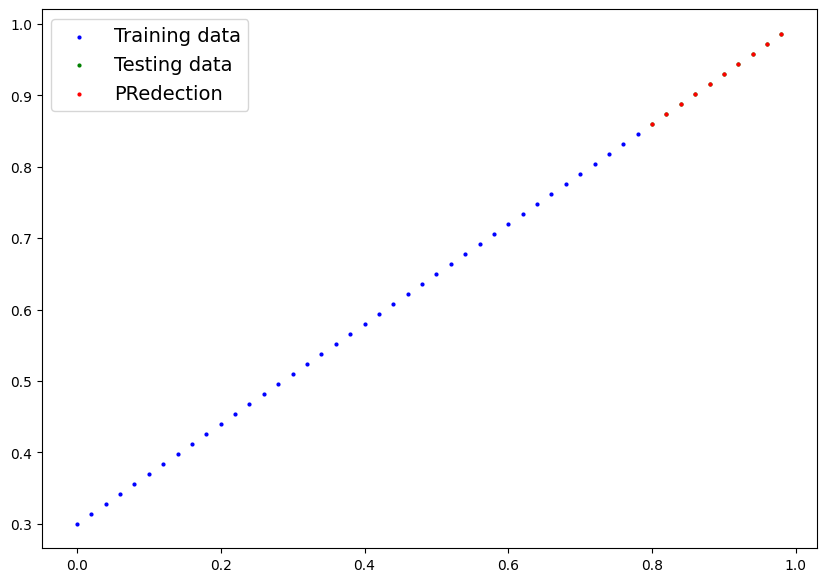

In [616]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predection(predection=y_preds_new)


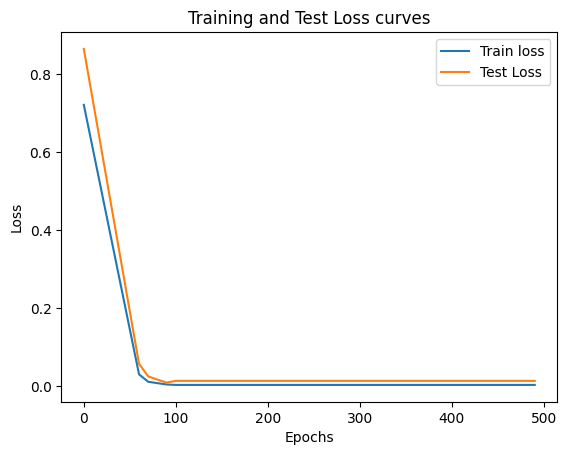

In [617]:
import numpy as np 

plt.plot(epoch_count , np.array(torch.tensor(loss_value).numpy()) , label="Train loss")
plt.plot(epoch_count , np.array(torch.tensor(test_loss_value).numpy()) , label= "Test Loss"  )
plt.title("Training and Test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

Saving a model in pytorch 

There are three main method for saving and loading method in pytorch.
1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()


In [618]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.7057])), ('bias', tensor([0.2948]))])

In [623]:
#  Saving our pytorch model
from pathlib import Path

#  create model directorty

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

#  Create model save path
MODEL_NAME = "First_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#  save the model state_dict
torch.save(obj=model_0.state_dict() , f=MODEL_SAVE_PATH)



In [629]:
#  loading a pytorch model 

#  to load in a saved state_dict ,we have to initiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

#  load the saved state_dict

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.state_dict()



OrderedDict([('weight', tensor([0.7057])), ('bias', tensor([0.2948]))])

In [633]:
#  Make some prediction with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [634]:
#  import pytorch and matplotlib

import pytest
from torch import nn
import matplotlib.pyplot as plt

#  setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu" 
print(f"Device is {device}")



Device is cpu


In [667]:
#  create some data using the linear regression formula of y = weight * x + bias

weight = 0.6
bias  = 0.1

#  create range values
start = 0
end - 1
step = 0.02

#  create X and Y (features and label)

X = torch.arange(start , end , step).unsqueeze(dim=1)
Y = weight * X + bias
print(X[:10])
print(Y[:10])



tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.1000],
        [0.1120],
        [0.1240],
        [0.1360],
        [0.1480],
        [0.1600],
        [0.1720],
        [0.1840],
        [0.1960],
        [0.2080]])


In [668]:
#  split the data for training and testing

train_split = int(0.8 * len(X))
X_train , Y_train = X[:train_split] , Y[:train_split]
X_test , Y_test = X[train_split:] , Y[train_split:]

len(X_train) , len(Y_test)

(40, 10)

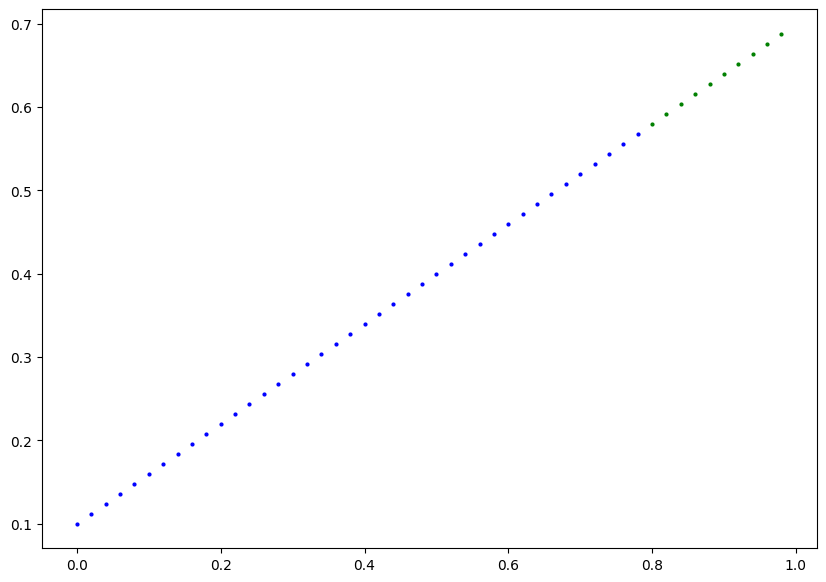

In [669]:
#  plot the data 

plot_predection(X_train , Y_train , X_test , Y_test)

In [670]:
#  Build a pytorch Linear model
#  create a linear model by subclassing nn.module 

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # nn.linear() for creating model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    
    # forward method
    def forward(self ,x:torch.Tensor) -> torch.Tensor :
        return self.linear_layer(x)

#  set the manual seed
torch.manual_seed(28)
model_1 = LinearRegressionModelV2()
model_1 , model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.2550]])),
              ('linear_layer.bias', tensor([0.4614]))]))

trainin the model

* Loss function
* optimiser
* training loop
* testing loop

In [671]:
#  set the device to use target device

model_1.to(device)
next(model_1.parameters()).device

#  setup the loss function
loss_fn = nn.L1Loss()

#  setup the optimizer
optimizer = torch.optim.SGD(params= model_1.parameters()  ,lr=0.01)


In [679]:
#  let's write a training loop

torch.manual_seed(28)

epochs = 200

for epoch in  range(epochs):
    model_1.train()

    # forward pass
    Y_pred = model_1(X_train)

    #  calculate the loss
    loss = loss_fn(Y_pred , Y_train)

    #  optimzer zero grad
    optimizer.zero_grad()

    #  perform backpropagation
    loss.backward()

    #  optimizer step
    optimizer.step()

    #  Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, Y_test)

    #  print out what's happening
        
    if epoch % 10 == 0:
        print(f"epoch : {epoch} | loss : {loss} | test loss : {test_loss} ")



epoch : 0 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 10 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 20 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 30 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 40 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 50 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 60 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 70 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 80 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 90 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 100 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 110 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 120 | loss : 0.007534930016845465 | test loss : 0.00707774143666029 
epoch : 13

In [680]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5977]])),
             ('linear_layer.bias', tensor([0.1084]))])

tensor([[0.5866],
        [0.5986],
        [0.6105],
        [0.6225],
        [0.6344],
        [0.6464],
        [0.6583],
        [0.6703],
        [0.6822],
        [0.6942]])
tensor([[0.5800],
        [0.5920],
        [0.6040],
        [0.6160],
        [0.6280],
        [0.6400],
        [0.6520],
        [0.6640],
        [0.6760],
        [0.6880]])


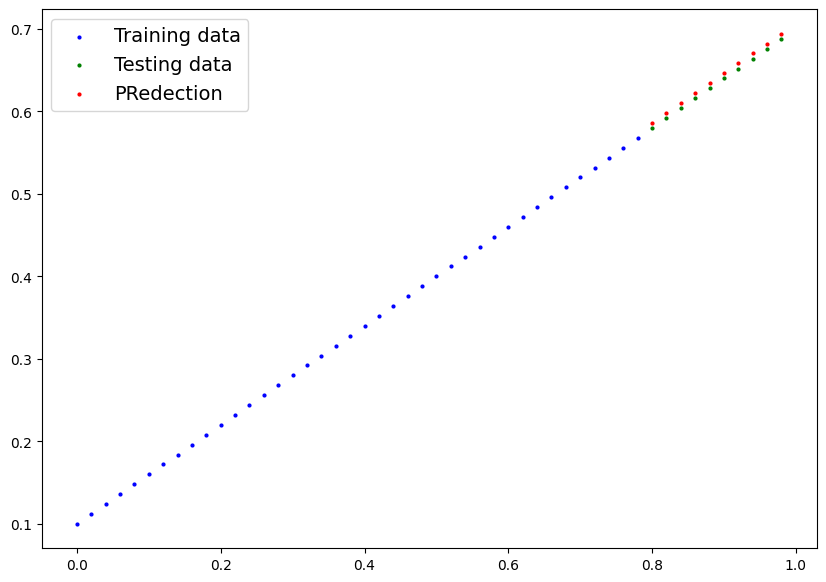

In [689]:
#  turn model into evalution mode 
model_1.eval()

with torch.inference_mode():
    Y_pred = model_1(X_test)
print(Y_pred)
print(Y_test)

plot_predection(X_train , Y_train , X_test , Y_test , predection=Y_pred)

Saving and loading the trained model        

In [682]:
from pathlib import Path

#  create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)
MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#  saving the model dictionary

torch.save(obj=model_1.state_dict() , f=MODEL_SAVE_PATH)

In [684]:
#  load a pytorch

loaded_model_1 = LinearRegressionModelV2()

#  load the saved model_1 state dict

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#  load the model to device

loaded_model_1.to(device)

print(loaded_model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.5977]])), ('linear_layer.bias', tensor([0.1084]))])


In [690]:
#  evalute the loaded model

loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_pred = loaded_model_1(X_test)

Y_pred == loaded_model_1_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])